In [16]:
# keep this function handy for all network visualizations in all chapters

# keep this function handy for all network visualizations in all chapters

import networkx as nx
import numpy as np
from IPython.display import SVG
from sknetwork.visualization import svg_graph
from sknetwork.data import Bunch
import pandas as pd
from tqdm import tqdm
from newspaper import Article
import time
import spacy
import scipy.sparse as sp


def draw_graph(G, show_names=False, node_size=0.2, font_size=10, edge_width=0.2, scale=1.0, node_color="lightblue", edge_color="black"):
    if not isinstance(G, nx.Graph):
        raise ValueError("Input graph must be a NetworkX Graph object.")

    adjacency = nx.to_numpy_array(G, nodelist=None, dtype=None, order=None, multigraph_weight=sum, weight='weight', nonedge=0.0)
    adjacency = sp.csr_matrix(adjacency)
    #adjacency = nx.to_numpy_array(G, weight='weight', multigraph_weight=sum)
    names = np.array(list(G.nodes()))
    print(names)
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = names

    if show_names and 'names' not in graph:
        raise ValueError("Graph must have node names if show_names is True.")

    image = svg_graph(
        graph.adjacency,  # Remove unused pagerank scores
        edge_width=edge_width,
        display_node_weight=True,
        node_size=node_size,
        font_size=font_size,
        names=graph.names if show_names else None,
        width=1024,
        height=1024,
        margin=0,
        scale=1.0,
        node_color="lightblue",
        edge_color="black",
        filename=None,
        directed=False

    )

    return SVG(image)

# data preparation and feature engineering

In [17]:
import networkx as nx 
import pandas as pd 
 
G = nx.les_miserables_graph() 

df = nx.to_pandas_edgelist(G)[['source', 'target']] # dropping 'weight' 

G = nx.from_pandas_edgelist(df) 

['Napoleon' 'Myriel' 'MlleBaptistine' 'MmeMagloire' 'CountessDeLo'
 'Geborand' 'Champtercier' 'Cravatte' 'Count' 'OldMan' 'Valjean' 'Labarre'
 'Marguerite' 'MmeDeR' 'Isabeau' 'Gervais' 'Fantine' 'MmeThenardier'
 'Thenardier' 'Cosette' 'Javert' 'Fauchelevent' 'Bamatabois' 'Simplice'
 'Scaufflaire' 'Woman1' 'Judge' 'Champmathieu' 'Brevet' 'Chenildieu'
 'Cochepaille' 'Woman2' 'MotherInnocent' 'Gavroche' 'Gillenormand'
 'MlleGillenormand' 'Marius' 'Enjolras' 'Bossuet' 'Gueulemer' 'Babet'
 'Claquesous' 'Montparnasse' 'Toussaint' 'Listolier' 'Tholomyes' 'Fameuil'
 'Blacheville' 'Favourite' 'Dahlia' 'Zephine' 'Perpetue' 'Eponine'
 'Anzelma' 'Magnon' 'Pontmercy' 'Boulatruelle' 'Brujon' 'LtGillenormand'
 'Gribier' 'MmePontmercy' 'Mabeuf' 'Courfeyrac' 'MmeBurgon' 'Jondrette'
 'Combeferre' 'Prouvaire' 'Feuilly' 'Bahorel' 'Joly' 'Grantaire' 'Child1'
 'Child2' 'MmeHucheloup' 'BaronessT' 'MlleVaubois' 'MotherPlutarch']


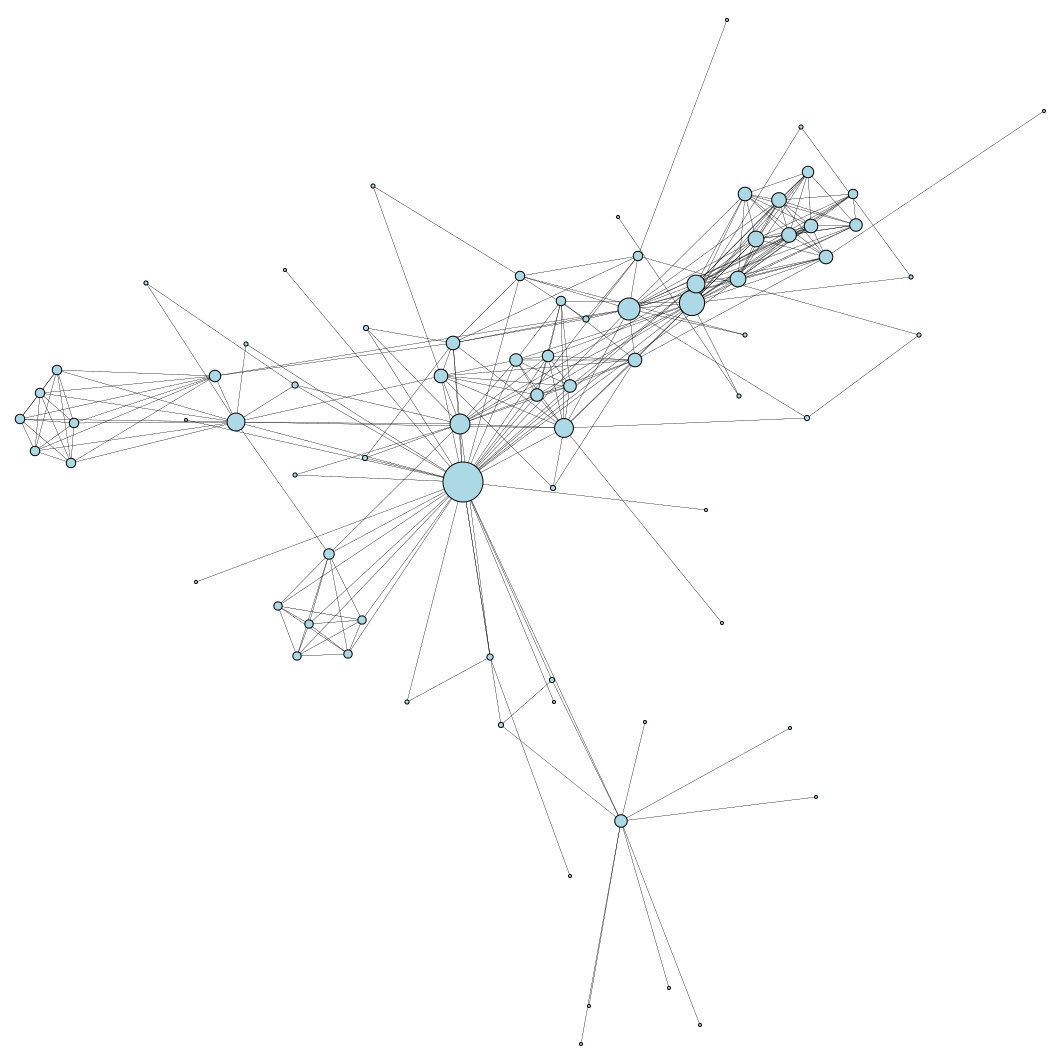

In [18]:
draw_graph(G)

In [19]:
degree_df = pd.DataFrame(G.degree) 
degree_df.columns = ['person', 'degrees'] 
degree_df.set_index('person', inplace=True) 
degree_df.head() 

,degrees
person,
Napoleon,1
Myriel,10
MlleBaptistine,3
MmeMagloire,3
CountessDeLo,1


In [20]:
clustering_df = pd.DataFrame(nx.clustering(G), index=[0]).T
clustering_df.columns = ['clustering']
clustering_df.head()

,clustering
Napoleon,0.000000
Myriel,0.066667
MlleBaptistine,1.000000
MmeMagloire,1.000000
CountessDeLo,0.000000


In [21]:
triangle_df = pd.DataFrame(nx.triangles(G), index=[0]).T 
triangle_df.columns = ['triangles'] 
triangle_df.head() 

,triangles
Napoleon,0
Myriel,3
MlleBaptistine,3
MmeMagloire,3
CountessDeLo,0


In [22]:
betw_cent_df = pd.DataFrame(nx.betweenness_centrality(G), index=[0]).T 
betw_cent_df.columns = ['betw_cent'] 
betw_cent_df.head() 

,betw_cent
Napoleon,0.000000
Myriel,0.176842
MlleBaptistine,0.000000
MmeMagloire,0.000000
CountessDeLo,0.000000


In [23]:
close_cent_df = pd.DataFrame(nx.closeness_centrality(G), index=[0]).T 
close_cent_df.columns = ['close_cent'] 
close_cent_df.head() 

,close_cent
Napoleon,0.301587
Myriel,0.429379
MlleBaptistine,0.413043
MmeMagloire,0.413043
CountessDeLo,0.301587


In [24]:
pr_df = pd.DataFrame(nx.pagerank(G), index=[0]).T 
pr_df.columns = ['pagerank'] 
pr_df.head() 

,pagerank
Napoleon,0.005584
Myriel,0.042803
MlleBaptistine,0.010279
MmeMagloire,0.010279
CountessDeLo,0.005584


In [25]:
adj_df = nx.to_pandas_adjacency(G) 
adj_df.columns = ['adj_' + c.lower() for c in adj_df.columns] 
adj_df.head() 

,adj_napoleon,adj_myriel,adj_mllebaptistine,adj_mmemagloire,adj_countessdelo,adj_geborand,adj_champtercier,adj_cravatte,adj_count,adj_oldman,...,adj_feuilly,adj_bahorel,adj_joly,adj_grantaire,adj_child1,adj_child2,adj_mmehucheloup,adj_baronesst,adj_mllevaubois,adj_motherplutarch
Napoleon,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Myriel,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MlleBaptistine,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MmeMagloire,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CountessDeLo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# merging datasets - creating ML training data

In [26]:
clf_df = pd.DataFrame() 
clf_df = degree_df.merge(clustering_df, left_index=True, right_index=True) 
clf_df = clf_df.merge(triangle_df, left_index=True, right_index=True) 
clf_df = clf_df.merge(betw_cent_df, left_index=True, right_index=True) 
clf_df = clf_df.merge(close_cent_df, left_index=True, right_index=True) 
clf_df = clf_df.merge(pr_df, left_index=True, right_index=True) 
clf_df = clf_df.merge(adj_df, left_index=True, right_index=True) 
clf_df.head(10) 

,degrees,clustering,triangles,betw_cent,close_cent,pagerank,adj_napoleon,adj_myriel,adj_mllebaptistine,adj_mmemagloire,...,adj_feuilly,adj_bahorel,adj_joly,adj_grantaire,adj_child1,adj_child2,adj_mmehucheloup,adj_baronesst,adj_mllevaubois,adj_motherplutarch
Napoleon,1,0.000000,0,0.000000,0.301587,0.005584,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Myriel,10,0.066667,3,0.176842,0.429379,0.042803,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MlleBaptistine,3,1.000000,3,0.000000,0.413043,0.010279,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MmeMagloire,3,1.000000,3,0.000000,0.413043,0.010279,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CountessDeLo,1,0.000000,0,0.000000,0.301587,0.005584,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Geborand,1,0.000000,0,0.000000,0.301587,0.005584,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Champtercier,1,0.000000,0,0.000000,0.301587,0.005584,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cravatte,1,0.000000,0,0.000000,0.301587,0.005584,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Count,1,0.000000,0,0.000000,0.301587,0.005584,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OldMan,1,0.000000,0,0.000000,0.301587,0.005584,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
revolutionaries = ['Bossuet', 'Enjolras', 'Bahorel', 'Gavroche', 'Grantaire',  
                   'Prouvaire', 'Courfeyrac', 'Feuilly', 'Mabeuf', 'Marius', 'Combeferre'] 

# spot check - these are the revolutionaries
clf_df[clf_df.index.isin(revolutionaries)] 

,degrees,clustering,triangles,betw_cent,close_cent,pagerank,adj_napoleon,adj_myriel,adj_mllebaptistine,adj_mmemagloire,...,adj_feuilly,adj_bahorel,adj_joly,adj_grantaire,adj_child1,adj_child2,adj_mmehucheloup,adj_baronesst,adj_mllevaubois,adj_motherplutarch
Gavroche,22,0.354978,82,0.165113,0.513514,0.035764,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
Marius,19,0.333333,57,0.132032,0.531469,0.030893,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Enjolras,15,0.609524,64,0.042553,0.481013,0.021880,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Bossuet,13,0.769231,60,0.030754,0.475000,0.018957,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Mabeuf,11,0.690909,38,0.027661,0.395833,0.017476,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Courfeyrac,13,0.756410,59,0.005267,0.400000,0.018576,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Combeferre,11,0.927273,51,0.001250,0.391753,0.015890,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Prouvaire,9,1.000000,36,0.000000,0.356808,0.013144,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Feuilly,11,0.927273,51,0.001250,0.391753,0.015890,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bahorel,12,0.863636,57,0.002185,0.393782,0.017197,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
clf_df['label'] = clf_df.index.isin(revolutionaries).astype(int) 

In [29]:
# create the training data for chapter 11

outfile = 'clf_df.csv'

keep_cols = ['degrees', 'clustering', 'triangles', 'betw_cent', 'close_cent', 'pagerank', 'label']
clf_df[keep_cols].reset_index().to_csv(outfile, header=True, index=False)

In [30]:
clf_df[['label']].sort_index().head(10) 

,label
Anzelma,0
Babet,0
Bahorel,1
Bamatabois,0
BaronessT,0
Blacheville,0
Bossuet,1
Boulatruelle,0
Brevet,0
Brujon,0


In [31]:
clf_df['label'].value_counts() 

label
0    66
1    11
Name: count, dtype: int64

In [32]:
clf_df['label'].value_counts(normalize=True)

label
0    0.857143
1    0.142857
Name: proportion, dtype: float64

In [33]:
X_cols = clf_df.columns[0:-1] 

X = clf_df[X_cols] 

y = clf_df['label'].values 

In [34]:
X.head() 

,degrees,clustering,triangles,betw_cent,close_cent,pagerank,adj_napoleon,adj_myriel,adj_mllebaptistine,adj_mmemagloire,...,adj_feuilly,adj_bahorel,adj_joly,adj_grantaire,adj_child1,adj_child2,adj_mmehucheloup,adj_baronesst,adj_mllevaubois,adj_motherplutarch
Napoleon,1,0.000000,0,0.000000,0.301587,0.005584,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Myriel,10,0.066667,3,0.176842,0.429379,0.042803,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MlleBaptistine,3,1.000000,3,0.000000,0.413043,0.010279,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MmeMagloire,3,1.000000,3,0.000000,0.413043,0.010279,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CountessDeLo,1,0.000000,0,0.000000,0.301587,0.005584,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337, test_size=0.4) 

# training and validating the model

In [36]:
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier(random_state=1337, n_jobs=-1, n_estimators=100) 

clf.fit(X_train, y_train) 

train_acc = clf.score(X_train, y_train) 
test_acc = clf.score(X_test, y_test) 

print('train_acc: {} - test_acc: {}'.format(train_acc, test_acc)) 

train_acc: 1.0 - test_acc: 0.9354838709677419


In [37]:
predictions = clf.predict(X_test) 
predictions 

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1])

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.60      1.00      0.75         3

    accuracy                           0.94        31
   macro avg       0.80      0.96      0.86        31
weighted avg       0.96      0.94      0.94        31



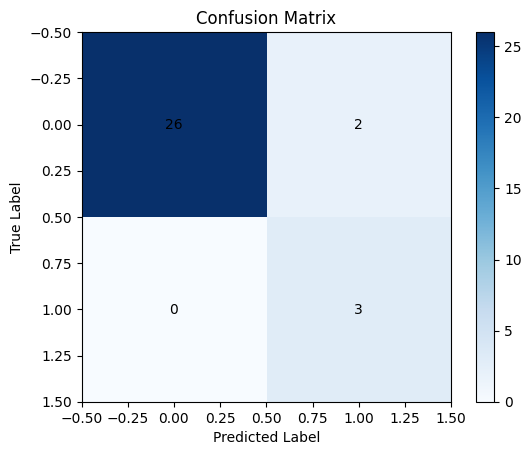

In [63]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show individual values (optional)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()

In [64]:
report = classification_report(y_test, predictions) 

print(report) 

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.60      1.00      0.75         3

    accuracy                           0.94        31
   macro avg       0.80      0.96      0.86        31
weighted avg       0.96      0.94      0.94        31



In [42]:
check_df = X_test.copy() 
check_df['label'] = y_test 
check_df['prediction'] = predictions 
check_df = check_df[['label', 'prediction']] 
check_df.head() 

,label,prediction
Cochepaille,0,0
Fauchelevent,0,0
Montparnasse,0,0
MlleGillenormand,0,0
Valjean,0,0


In [43]:
# look at the INCORRECT predictions

mask = check_df['label'] != check_df['prediction'] 
check_df[mask] 

,label,prediction
Joly,0,1
MmeHucheloup,0,1


In [44]:
clf.feature_importances_

array([0.0179655 , 0.01054689, 0.07066472, 0.0048393 , 0.00372502,
       0.00739952, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0028917 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00330338, 0.01015535, 0.        ,
       0.00182666, 0.00017135, 0.        , 0.        , 0.00186486,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01868208,
       0.00018293, 0.        , 0.00468656, 0.10708254, 0.10737939,
       0.00522886, 0.00140693, 0.00768527, 0.00173808, 0.        ,
       0.00073652, 0.00043659, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0025389 , 0.        ,
       0.        , 0.        , 0.        , 0.00136905, 0.        ,
       0.        , 0.        , 0.00970186, 0.06146466, 0.        ,
       0.        , 0.09028449, 0.05265165, 0.08645875, 0.08994

In [45]:
importance_df = pd.DataFrame(clf.feature_importances_, index=X_test.columns) 

importance_df.columns = ['value'] 

importance_df.sort_values('value', ascending=False, inplace=True) 

importance_df.head() 

,value
adj_bossuet,0.107379
adj_enjolras,0.107083
adj_combeferre,0.090284
adj_bahorel,0.089942
adj_feuilly,0.086459


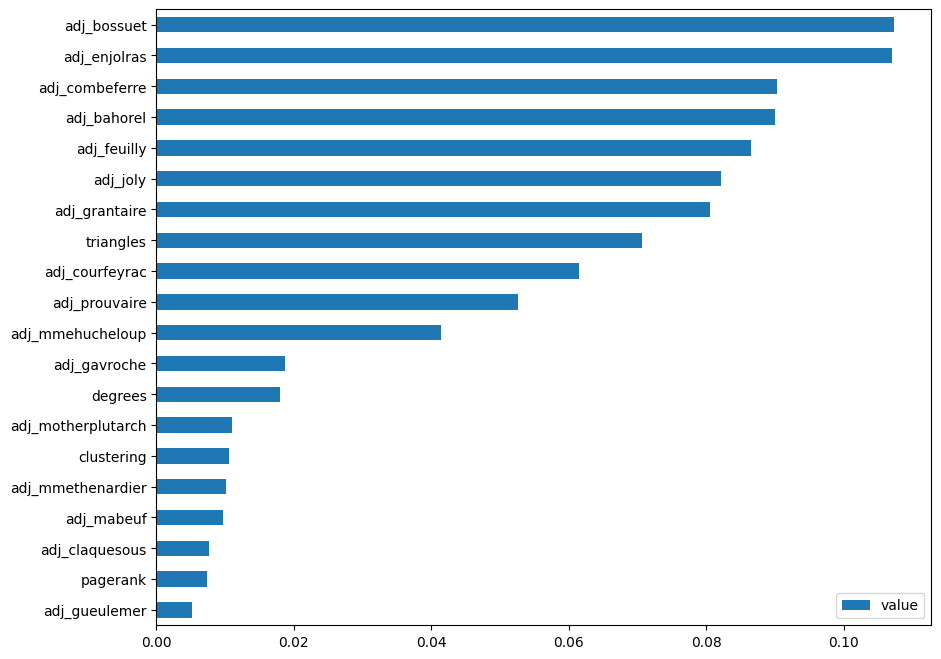

In [46]:
import matplotlib.pyplot as plt 

importance_df[0:20].plot.barh(figsize=(10,8)).invert_yaxis() 